The following script consists of a Python version of Andrew Ng Stanford Course 'Machine Learning' taught on the Coursera Platform
Note: All exercise data and structure are credited to Stanford University 

**Caveat:** Contrary to the modularity presented in Octave scripts and as I'm using Jupyter Notebooks for educational purposes we will implement the functions on the same notebook where we will call them

# Exercise 1 - Load and Estimate Dataset Statistics

In [1]:
# Import numpy libraries to deal with matrixes and vectors
import numpy as np
# Import pandas do read data files
import pandas as pd
# Import matplotlib to plot data
import matplotlib.pyplot as plt

# Import math 
import math 

# Import scipy optimization function
from scipy import optimize, io
from scipy.ndimage import rotate

# Matplotlib notebook property
%matplotlib inline

Anomaly detection is widely used across several machine problems to estimate the probability of some example not fitting some kind of "distribution".
<br> 
<br>
In our example we are going to evaluate the possibility of some examples not belonging to a gaussian distribution and therefore considering anomalous. This is an example of an unsupervised learning technique.

In [2]:
# Read the dataset 
X = io.loadmat('ex8data1.mat')['X']

Our data consists of throughput and latency data from several servers. We want to estimate which servers deviate more the norm, and we know that the data is approximately normally distributed.

In [4]:
def plotData(
    X: np.array
) -> None:
    '''
    Computes scatter plot of original data
    with X1 and X2 columns in each axis.
    
    Args:
        X(np.array): Array of original features.
    Returns:
        None        
    '''
    plt.scatter(X[:,0], X[:,1], marker='x', facecolors='blue')
    plt.xlabel('Latency (ms)')
    plt.ylabel('Througput (mb/s)')

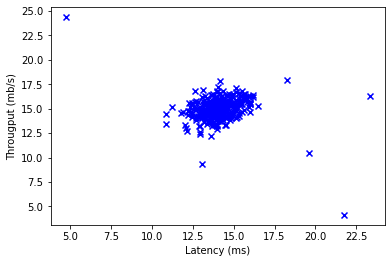

In [5]:
plotData(X)

A huge cloud of points are concentrated in the center of our graph. By looking at it we can see that there are some examples that don't seem the fit the distribution of our data.

# Exercise 2 - Estimating Gaussian

We can measure if the points belong to the distribution by looking at the probability of each example belonging to the distribution given a mean and a standard deviation:

<img src="assets/gaussianprob.png">

First, let's compute the statistics for each variable on our dataset:

In [116]:
def estimateGaussian(
    X: np.array
) -> np.array:
    '''
    Computes mean and standard deviation
    for each feature of the X array.
    
    Args:
        X(np.array): Original data.
        
    Returns:
        mean(np.array): Array of means of each ith feature.
        sigma(np.array): Array of standard deviation of 
        each ith feature.
    '''
    
    m, n = X.shape
    
    mean = np.zeros(n)
    sigma = np.zeros(n)
    
    for feature in range(n):
        
        mean[feature] = X[:,feature].sum()/m
        sigma[feature] = ((X[:,feature]-(mean[feature]))**2).sum()/m
        
    return mean.reshape(mean.shape[0], 1), sigma.reshape(sigma.shape[0], 1)

In [136]:
mu, sigma = estimateGaussian(X)

Now that we have obtained the mu and sigma parameters from the data, we can estimate the density for each point.

In [161]:
def multivariateGaussian(
    X: np.array, 
    mu: np.array,
    sigma2: np.array
) -> np.array:
    '''
    Estimates density using mu and sigma 
    parameters for each example in the 
    X dataset.
    
    Args:
        X(np.array): Original data.
        mu(np.array): Array of means.
        sigma2(np.array): Array of standard
        deviations.
    
    Returns:
        p(np.array): Density of each point
        using parameters mu and sigma
    '''
    
    # Define number of variables
    k = len(mu)
    
    
    # Create diagonal matrix based on sigma
    if sigma2.shape[0] == 1 or sigma2.shape[1] == 1:
        sigma2 = np.diag(sigma2.flatten())    
    
    # Compute density - based on user dibgerge implementation
    X = X - mu.T
    p_a = (2 * np.pi) ** (- k / 2) * np.linalg.det(sigma2) ** (-0.5)
    p_b = np.exp(-0.5 * np.sum(np.dot(X, np.linalg.pinv(sigma2)) * X, axis=1))
    
    p = p_a*p_b
    
    return p

In [163]:
p = multivariateGaussian(X, mu, sigma)